In [30]:
import sys, os
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapl'] + '/azav')
import scipy as sp

import numpy as np
import pickle

import matplotlib.pyplot as plt

%matplotlib inline

from azav_util import *
from plotcommon import *
from common import *

In [2]:
# Get Rachel's solar data
di = get_dict('gongdata/avgong1995-2009rls_full.pkl')
di.keys()

dict_keys(['om', 'om_err', 'nt', 'nr', 'tt', 'rr', 'sint', 'cost', 'rr_2d', 'tt_2d', 'sint_2d', 'cost_2d', 'xx', 'zz'])

In [3]:
# cut the data off below 0.5*rsun (like in Rachel's plot)
rbot = 0.5*rsun

In [4]:
# diffrot in "lab" frame
Om_nhz = di['om']
Om_err_nhz = di['om_err']

Om = Om_nhz*1e-9*(2*np.pi) # nHz --> rad/s

nt = di['nt']
nr = di['nr']

tt = di['tt']
rr = di['rr']*rsun

cost = di['cost']
sint = di['sint']

cost_2d = di['cost_2d']
sint_2d = di['sint_2d']

rr_2d = di['rr_2d']*rsun

xx = di['xx']
zz = di['zz']

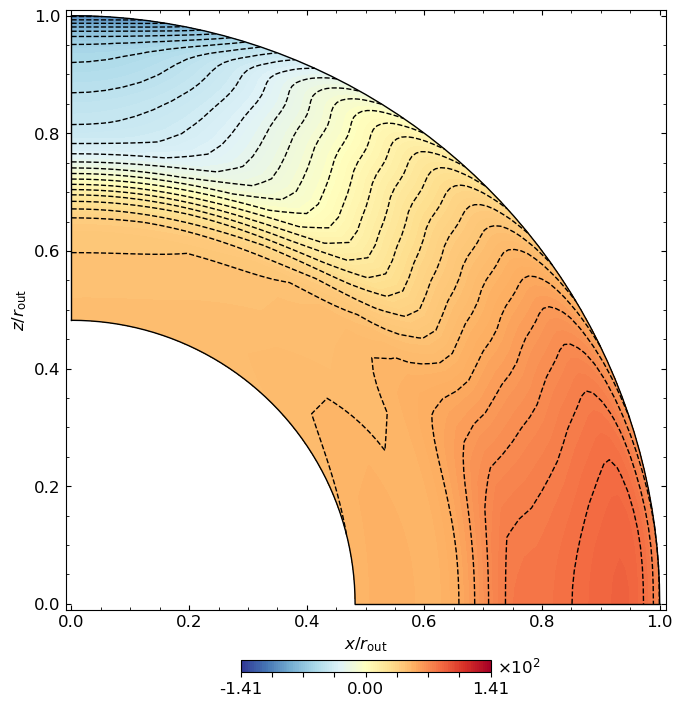

In [5]:
# plot the differential rotation

# specify any particular "command line arguments" here
notebook_clas = dict({'halfplane': True, 'sub_width_inches': 6, 'ncontours': 20})

# change some defaults
azav_fig_dimensions['sub_aspect'] = 1.0

azav_fig_dimensions['margin_top_inches'] += 0.25
plot_azav_kwargs_default['plotlatlines'] = False

# plot_azav and make_figure kwargs default
make_figure_kwargs_default.update(azav_fig_dimensions)

# update keyword args with "notebook" CLAs
kw_plot_azav = update_dict(plot_azav_kwargs_default, notebook_clas)
kw_make_figure = update_dict(make_figure_kwargs_default, notebook_clas)

# make figure and plot
fig, axs, fpar = make_figure(**kw_make_figure)
ax = axs[0, 0]

plot_azav (Om_nhz-380, rr, cost, fig, ax, **kw_plot_azav)

plt.show()

In [9]:
# get rotation rate derivatives
dOmdr = np.gradient(Om, rr, axis=1)
dOmdt = np.gradient(Om, tt, axis=0)/rr_2d
dOmdl = sint_2d*dOmdr + cost_2d*dOmdt
dOmdz = cost_2d*dOmdr - sint_2d*dOmdt

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_13246/605667378.py:3: RuntimeWarning: divide by zero encountered in divide
  dOmdt = np.gradient(Om, tt, axis=0)/rr_2d
/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_13246/605667378.py:5: RuntimeWarning: invalid value encountered in multiply
  dOmdz = cost_2d*dOmdr - sint_2d*dOmdt


In [26]:
# read in model S
fname = os.environ['notes'] + '/Model_S/Model_S.pkl'
model_S = get_dict(fname)
model_S.keys()

dict_keys(['msun', 'rsun', 'lsun', 'zsun', 'x0sun', 'alphasun', 'agesun', 'rr', 'lnq', 'grav', 'tmp', 'prs', 'rho', 'xfrac', 'lum', 'opa', 'eps', 'gamma', 'gamma_ad', 'delta', 'c_p', 'mue', 'ne', 'dsdr', 'nsq', 'zfrac', 'Ne', 'nu', 'kappa', 'eta', 'prm', 'pr', 'drhodr', 'dtmpdr', 'dprsdr', 'dlnrho', 'dlntmp', 'dlnprs', 'gas_constant', 'ircut', 'rcut', 'irbcz', 'rbcz', 'frad', 'heat', 'rtach', 'dtach', 'irtach', 'irtach1', 'irtach2', 'rtach1', 'rtach2', 'rrrz', 'nr', 'nrrz', 'reta', 'etaconst', 'iretaconst', 'retaconst'])

In [27]:
print("common:  ", rsun)
print("model S: ", model_S['rsun'])
print("GONG   : ", np.max(di['rr']))

common:   69570000000.0
model S:  69599062580.0
GONG   :  1.00071


In [28]:
# they're a bit different... use model_S rsun for consistency
rsun = model_S['rsun']

In [49]:
rr_model_S = model_S['rr']

y = model_S['grav']
f = sp.interpolate.interp1d(rr_model_S, y)
grav = f(rr)

y = model_S['c_p']
f = sp.interpolate.interp1d(rr_model_S, y)
c_p = f(rr)

y = model_S['tmp']
f = sp.interpolate.interp1d(rr_model_S, y)
tmp = f(rr)

y = model_S['rho']
f = sp.interpolate.interp1d(rr_model_S, y)
rho = f(rr)

y = model_S['prs']
f = sp.interpolate.interp1d(rr_model_S, y)
prs = f(rr)

y = model_S['delta'] # -dlnrho/dlntmp
f = sp.interpolate.interp1d(rr_model_S, y)
delta = f(rr)

y = model_S['dlntmp']/model_S['dlnprs'] # -dlnrho/dlntmp
f = sp.interpolate.interp1d(rr_model_S, y)
dtdp = f(rr)

y = model_S['dsdr']/model_S['dlnprs'] # -dlnrho/dlntmp
f = sp.interpolate.interp1d(rr_model_S, y)
dsdp = f(rr)/c_p

y = model_S['dsdr'] # dsdr
f = sp.interpolate.interp1d(rr_model_S, y)
dsdr = f(rr)

print("len(prs) = ", len(prs))
print("len(prs_S)= ", len(model_S['prs']))
print("shape Om", np.shape(Om))

rho_2d = rho.reshape((1, nr))

len(prs) =  38
len(prs_S)=  2482
shape Om (49, 38)


In [35]:
print(np.min(rho), np.max(rho))

4.7882508078302314e-08 1.6255498085128246


/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_13246/2984894521.py:29: RuntimeWarning: invalid value encountered in multiply
  plot_azav (-rr_2d*sint_2d*dOmdl, rr, cost, fig, axs[1, 0], **kw_plot_azav)


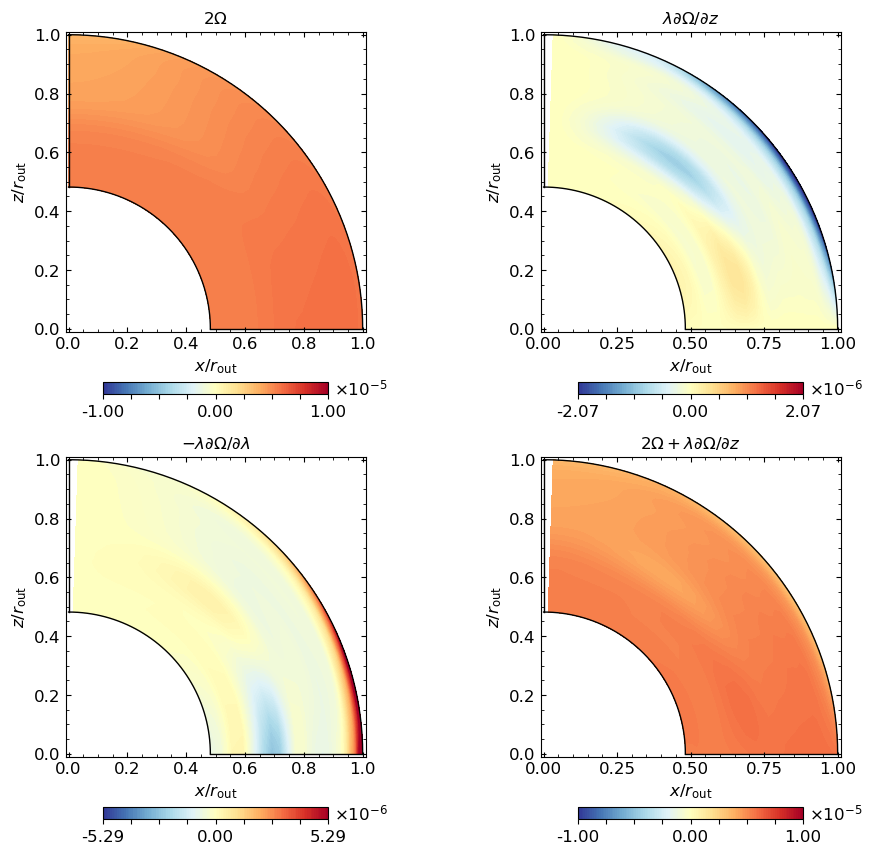

In [44]:
# plot DR derivatives, cylindrical, weighted by rho
plt.close()
# specify any particular "command line arguments" here
notebook_clas = dict({'halfplane': True, 'sub_width_inches': 3, 'ncontours': 20,
                     'nplots': 4, 'nrow': 2, 'plotcontours': False})

# change some defaults
azav_fig_dimensions['sub_aspect'] = 1.0

azav_fig_dimensions['margin_top_inches'] += 0.25
plot_azav_kwargs_default['plotlatlines'] = False

# plot_azav and make_figure kwargs default
make_figure_kwargs_default.update(azav_fig_dimensions)

# update keyword args with "notebook" CLAs
kw_plot_azav = update_dict(plot_azav_kwargs_default, notebook_clas)
kw_make_figure = update_dict(make_figure_kwargs_default, notebook_clas)

# make figure and plot
fig, axs, fpar = make_figure(**kw_make_figure)

maxabs = 1e-5
kw_plot_azav.minmax = (-maxabs, maxabs)
plot_azav (2*Om, rr, cost, fig, axs[0,0], **kw_plot_azav)

kw_plot_azav.minmax = None
plot_azav (rr_2d*sint_2d*dOmdz, rr, cost, fig, axs[0, 1], **kw_plot_azav)
plot_azav (-rr_2d*sint_2d*dOmdl, rr, cost, fig, axs[1, 0], **kw_plot_azav)

maxabs = 1e-5
kw_plot_azav.minmax = (-maxabs, maxabs)
plot_azav (  (2*Om+rr_2d*sint_2d*dOmdz), rr, cost, fig, axs[1, 1], **kw_plot_azav)

axs[0,0].set_title(r'$2\Omega$')
axs[0,1].set_title(r'$\lambda\partial\Omega/\partial z$')
axs[1,0].set_title(r'$-\lambda\partial\Omega/\partial \lambda$')
axs[1,1].set_title(r'$2\Omega+\lambda\partial\Omega/\partial z$')

plt.show()

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_13246/1663224596.py:31: RuntimeWarning: invalid value encountered in multiply
  plot_azav (rr_2d*sint_2d*dOmdt, rr, cost, fig, axs[0, 1], **kw_plot_azav)
/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_13246/1663224596.py:32: RuntimeWarning: invalid value encountered in multiply
  plot_azav (2*Om*cost_2d + rr_2d*sint_2d*dOmdt, rr, cost, fig, axs[0, 2], **kw_plot_azav)


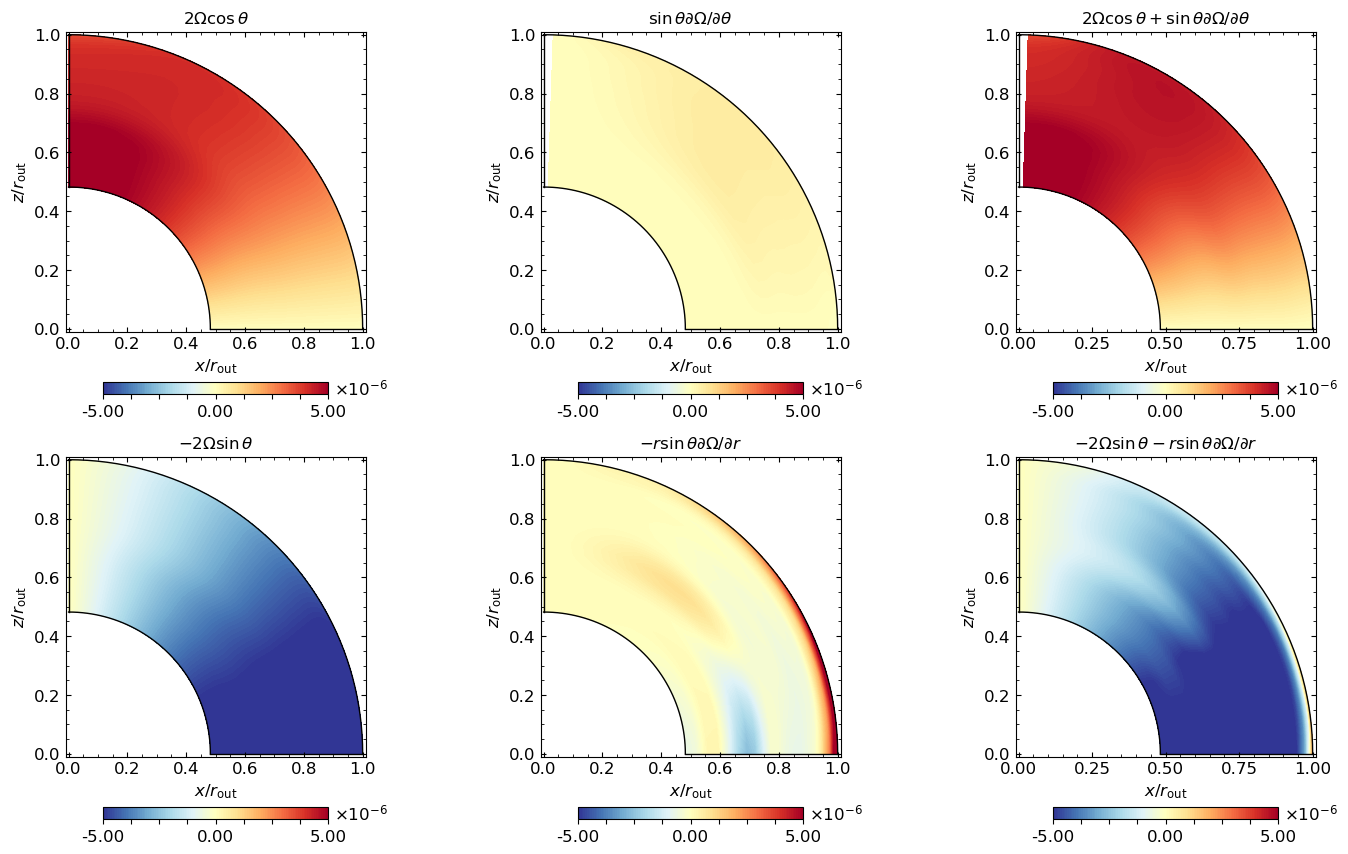

In [46]:
# plot DR derivatives, cylindrical, weighted by rho
plt.close()
# specify any particular "command line arguments" here
notebook_clas = dict({'halfplane': True, 'sub_width_inches': 3, 'ncontours': 20,
                     'nplots': 6, 'nrow': 2, 'plotcontours': False})

# change some defaults
azav_fig_dimensions['sub_aspect'] = 1.0

azav_fig_dimensions['margin_top_inches'] += 0.25
plot_azav_kwargs_default['plotlatlines'] = False

# plot_azav and make_figure kwargs default
make_figure_kwargs_default.update(azav_fig_dimensions)

# update keyword args with "notebook" CLAs
kw_plot_azav = update_dict(plot_azav_kwargs_default, notebook_clas)
kw_make_figure = update_dict(make_figure_kwargs_default, notebook_clas)

# make figure and plot
fig, axs, fpar = make_figure(**kw_make_figure)



#kw_plot_azav.minmax=None

maxabs = 5e-6
kw_plot_azav.minmax = (-maxabs, maxabs)

plot_azav (2*Om*cost_2d, rr, cost, fig, axs[0,0], **kw_plot_azav)
plot_azav (rr_2d*sint_2d*dOmdt, rr, cost, fig, axs[0, 1], **kw_plot_azav)
plot_azav (2*Om*cost_2d + rr_2d*sint_2d*dOmdt, rr, cost, fig, axs[0, 2], **kw_plot_azav)

plot_azav (-2*Om*sint_2d, rr, cost, fig, axs[1, 0], **kw_plot_azav)
plot_azav ( -rr_2d*sint_2d*dOmdr, rr, cost, fig, axs[1, 1], **kw_plot_azav)
plot_azav ( -2*Om*sint_2d-rr_2d*sint_2d*dOmdr, rr, cost, fig, axs[1, 2], **kw_plot_azav)

axs[0,0].set_title(r'$2\Omega\cos\theta$')
axs[0,1].set_title(r'$\sin\theta\partial\Omega/\partial\theta$')
axs[0,2].set_title(r'$2\Omega\cos\theta + \sin\theta\partial\Omega/\partial\theta$')

axs[1,0].set_title(r'$-2\Omega\sin\theta$')
axs[1,1].set_title(r'$-r\sin\theta\partial\Omega/\partial r$')
axs[1,2].set_title(r'$-2\Omega\sin\theta -r\sin\theta\partial\Omega/\partial r$')

plt.show()

In [47]:
# OK, get thermal wind piece

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_13246/1924009379.py:24: RuntimeWarning: divide by zero encountered in divide
  plot_azav (1/rr_2d*dSdt_tw, rr, cost, fig, ax, **kw_plot_azav)


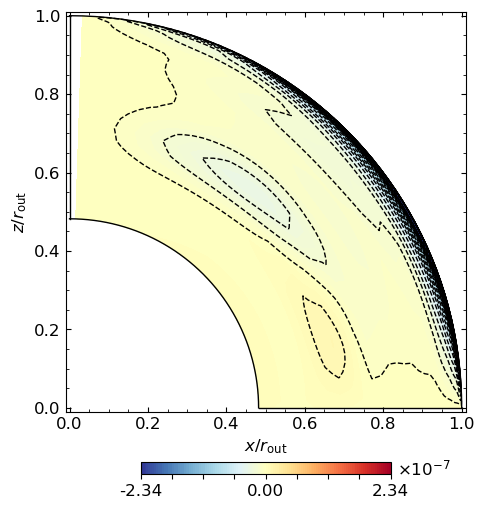

In [51]:
dsdt_tw = (c_p/(grav*delta)).reshape((1, nr)) * rr_2d**2*sint_2d * (2*Om*dOmdz)
# plot entropy gradient meridional plane

# specify any particular "command line arguments" here
notebook_clas = dict({'halfplane': True, 'sub_width_inches': 4, 'ncontours': 20})

# change some defaults
azav_fig_dimensions['sub_aspect'] = 1.0

azav_fig_dimensions['margin_top_inches'] += 0.25
plot_azav_kwargs_default['plotlatlines'] = False

# plot_azav and make_figure kwargs default
make_figure_kwargs_default.update(azav_fig_dimensions)

# update keyword args with "notebook" CLAs
kw_plot_azav = update_dict(plot_azav_kwargs_default, notebook_clas)
kw_make_figure = update_dict(make_figure_kwargs_default, notebook_clas)

# make figure and plot
fig, axs, fpar = make_figure(**kw_make_figure)
ax = axs[0, 0]

plot_azav (1/rr_2d*dsdt_tw, rr, cost, fig, ax, **kw_plot_azav)

plt.show()